In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ugradio

In [5]:
local_now = ugradio.timing.local_time() # current local time as a string
ut_now = ugradio.timing.utc() # current UTC as a string
ut_now = ugradio.timing.unix_time() # seconds since 1 January 1970
julian_now = ugradio.timing.julian_date() # current julian day (which \
#contains the current time, too--it’s not just an integer \number.
lst_now = ugradio.timing.lst() # current LST at NCH
lst_julian = ugradio.timing.lst() # LST for the specified Julian day
ut_julian = ugradio.timing.unix_time() # seconds since 1/1/1970 for given JD (jd)
julian_ut = ugradio.timing.julian_date() # julian day for given unix time (ut)

In [4]:
#local_now = ugradio.timing.local_time()
#ut_now = ugradio.timing.unix_time()
#julian_now = ugradio.timing.julian_date()
#lst_julian = ugradio.timing.lst()
#cold_data_ = ugradio.pico.capture_data('50mV',divisor=1, dual_mode=True, nblocks=1000)

In [7]:
print(local_now, ut_now, julian_now, lst_julian)
# Mon Feb 22 15:20:57 2021, 1614036057.9803557, 2459268.4728932925, 0.36758801221325654

Mon Feb 22 15:20:57 2021 1614036057.9803557 2459268.4728932925 0.36758801221325654


In [8]:
#np.savez('olivia_cold_data.npz', cold_data_)

In [3]:
#data_1000 = ugradio.pico.capture_data('50mV',divisor=1, dual_mode=True, nblocks=1000)

In [6]:
#np.savez('data_1000.npz',data_1000)

In [6]:
data_1000 = np.load('../Data/data_1000.npz')['arr_0'][0][0]

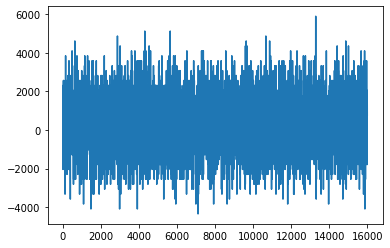

In [8]:
plt.plot(data_1000)

In [5]:
olivia_cold_data = np.load('olivia_cold_data.npz') #['arr_0'][0][0]
#print(olivia_cold_data)

In [21]:
#local = ugradio.timing.local_time()
#ut_= ugradio.timing.unix_time()
#julian = ugradio.timing.julian_date()
#lstjulian = ugradio.timing.lst()
#galatic_data_ = ugradio.pico.capture_data('50mV',divisor=1, dual_mode=True, nblocks=1000)

In [23]:
np.savez('galatic_data_olivia',galatic_data_)

In [25]:
print(local,ut_,julian,lstjulian)
#Tue Feb 23 14:15:01 2021 1614118501.1561606 2459269.427096716 0.09625452367024782

Tue Feb 23 14:15:01 2021 1614118501.1561606 2459269.427096716 0.09625452367024782


In [26]:
print(local)

Tue Feb 23 14:15:01 2021


In [6]:
cal_data_2 = np.load('../Data/big_horn_data_1000.npz.zip')
cal_data_2.files

['big_horn_data_1000']

In [14]:
#cal_data_2 = np.load('../Data/big_horn_data_1000.npz.zip')
cal_data_2 = np.load('../Data/50mV data with rain.npz') #50mV data with rain.npz
#cold_data_1 = np.load('../Data/big_horn_data_1000.npy')

cold_data = olivia_cold_data['arr_0'][0] - (olivia_cold_data["arr_0"][1]*5/4*1j)
cal_data = cal_data_2['arr_0'][0] - (cal_data_2['arr_0'][1]*5/4*1j)



# resize blocks
cold_data.shape = (-1, 2000)
cal_data.shape = (-1, 2000)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


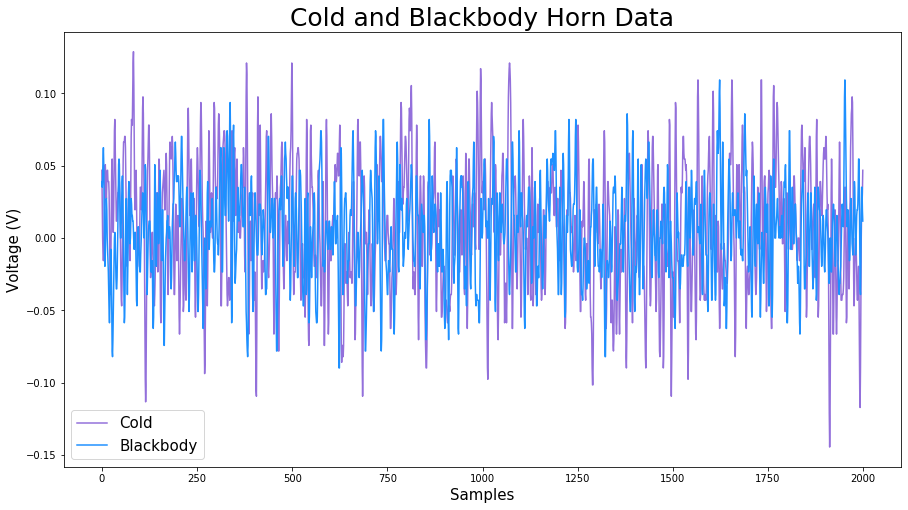

In [15]:
plt.figure(figsize=(15, 8))
plt.plot(cold_data[0]/2**16, "mediumpurple", label="Cold")
plt.plot(cal_data[0]/2**16, "dodgerblue", label="Blackbody")
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Voltage (V)", fontsize=15)
plt.title("Cold and Blackbody Horn Data", fontsize=25)
plt.legend(fontsize=15)

In [16]:
# COLD DATA
freq = np.fft.fftfreq(cold_data.shape[1], 1/62.5e6)
freq = np.fft.fftshift(freq)/1e6

blocks = 8000
avg_power_array = []
for n in range (0, blocks):
    data_new = cold_data[n]
    ft = np.fft.fft(data_new)
    ft = np.fft.fftshift(ft)
    power = abs(ft)**2
    avg_power_array.append(power)
    
avg_power_array = np.mean(avg_power_array, axis = 0)
s_cold = avg_power_array

No handles with labels found to put in legend.


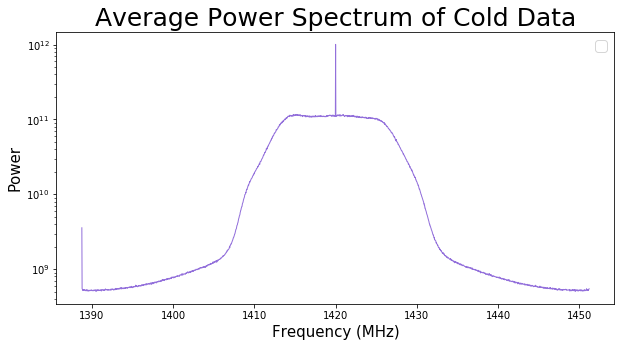

In [17]:
#%matplotlib notebook
plt.figure(figsize=(10,5))
plt.plot(freq + 1230 + 190, avg_power_array, "mediumpurple", linewidth=1)
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Average Power Spectrum of Cold Data", fontsize=25)
plt.legend(fontsize=15)

#plt.xlim(-2, 2)
#plt.vlines(1420.4058, ymin=10e8, ymax=10e11, linewidth=.5)

In [18]:
# CAL DATA
cal_freq = np.fft.fftfreq(cal_data.shape[1], 1/62.5e6)
cal_freq = np.fft.fftshift(cal_freq)/1e6

blocks = 800
avg_rain_power_array = []
for n in range (0, blocks):
    data_new = cal_data[n]
    ft = np.fft.fft(data_new)
    ft = np.fft.fftshift(ft)
    power = abs(ft)**2
    avg_rain_power_array.append(power)
    
avg_rain_power_array = np.mean(avg_rain_power_array, axis=0)
s_cal = avg_rain_power_array

No handles with labels found to put in legend.


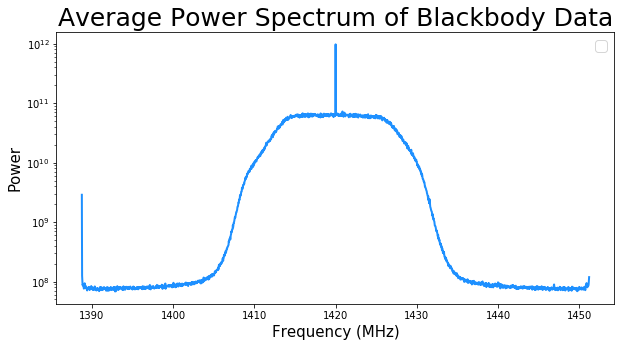

In [19]:
plt.figure(figsize=(10,5))
plt.plot(cal_freq + 1230 + 190, avg_rain_power_array, "dodgerblue", linewidth=2)
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Average Power Spectrum of Blackbody Data", fontsize=25)
plt.legend(fontsize=15)
#plt.xlim(-1, 1)
#plt.vlines(1420.4058, ymin=10e8, ymax=10e11, linewidth=.5)

No handles with labels found to put in legend.


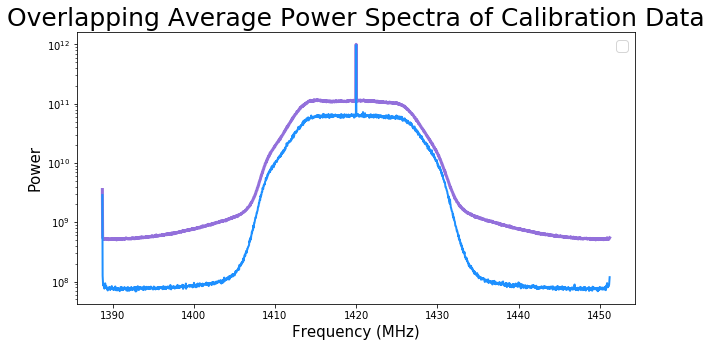

In [20]:
#%matplotlib notebook

plt.figure(figsize=(10,5))
plt.plot(freq + 1230 + 190, avg_power_array, "mediumpurple", linewidth=3)
plt.plot(cal_freq + 1230 + 190, avg_rain_power_array, "dodgerblue", linewidth=2)
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Overlapping Average Power Spectra of Calibration Data", fontsize=25)
plt.legend(fontsize=15)
#plt.xlim(-1, 1)
#plt.vlines(1420.4058, ymin=10e8, ymax=10e11, linewidth=.5)

In [ ]:
#galactic_dataa = galactic_data['arr_0'][0] - (galactic_data["arr_0"][1]*5/4*1j)

# resize blocks
galactic_dataa.shape = (-1, 2000)
galactic_dataa.shape

In [ ]:
# GALACTIC DATA, S_ON BECAUSE WE ARE OBSERVING HYDROGEN LINE
galactic_freq = np.fft.fftfreq(galactic_dataa.shape[1], 1/62.5e6)
galactic_freq = np.fft.fftshift(galactic_freq)/1e6

blocks = 8000
avg_galactic_power_array = []
for n in range (0, blocks):
    data_new = galactic_dataa[n]
    ft = np.fft.fft(data_new)
    ft = np.fft.fftshift(ft)
    power = abs(ft)**2
    avg_galactic_power_array.append(power)
    
avg_galactic_power_array = np.mean(avg_galactic_power_array, axis = 0)
s_on = avg_galactic_power_array
g_freq = galactic_freq + 1230 + 190

In [ ]:
#%matplotlib notebook
plt.figure(figsize=(15,8))
plt.plot(g_freq, avg_galactic_power_array, "purple", linewidth=2, label="Galactic Plane Power Spectrum")
plt.yscale("log")
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("Power", fontsize=15)
plt.title("Average Power Spectrum of Galactic Data", fontsize=25)

#plt.xlim(-2, 2)
plt.vlines(1420.4058, ymin=0, ymax=10e11, linestyle="dashed", linewidth=.5, label="HI Line")

plt.legend(fontsize=15)